# Assignment 1 :  Flight Delay Forecasting

- **Machine Learning, Innopolis University (Fall semester 2021)**
- **By Mohamed Gamal Elbayoumi**

### Setup

In [85]:

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**Import Data**

In [60]:
df = pd.read_csv('flight_delay.csv')
df.head()

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0


**Exploratory data analysis (EDA)**

In [61]:
df.shape

(675513, 5)

In [62]:
# Get necessary details about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675513 entries, 0 to 675512
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Depature Airport         675513 non-null  object 
 1   Scheduled depature time  675513 non-null  object 
 2   Destination Airport      675513 non-null  object 
 3   Scheduled arrival time   675513 non-null  object 
 4   Delay                    675513 non-null  float64
dtypes: float64(1), object(4)
memory usage: 25.8+ MB


In [63]:
# show unique airports in dataset
print("Number of depature airports:    {}".format(len(df['Depature Airport'].unique())))
print("Number of destination airports: {}".format(len(df['Destination Airport'].unique())))

Number of depature airports:    179
Number of destination airports: 177


In [64]:
# Looking for missing values
df.isna().sum()

Depature Airport           0
Scheduled depature time    0
Destination Airport        0
Scheduled arrival time     0
Delay                      0
dtype: int64

**Observe :** Dataset have no missing values

In [65]:
# Any duplicates?
df.duplicated().sum()

3

In [66]:
# Delete these duplicate
df.drop_duplicates(inplace=True)

In [67]:
#Test
df.duplicated().sum()

0

## Data preprocessing and visualization

In [68]:
# graphe between Scheduled depature time & Delay


In [69]:
# Converting depature time & arrival time from object to a sutaible format
df['Scheduled depature time'] = pd.to_datetime(df['Scheduled depature time'],format='%Y-%m-%d %H:%M:%S')
df['Scheduled arrival time']  = pd.to_datetime(df['Scheduled arrival time'],format='%Y-%m-%d %H:%M:%S')

In [70]:
# Adding new feature 'flight_duration'
flight_duration = df['Scheduled arrival time']-df['Scheduled depature time']
# Converting duration to be in hour and add it to data frame
flight_duration = flight_duration.dt.total_seconds()/3600
df['flight_duration'] = flight_duration
# Modify Daley feature to be in hour also, so the distances between values not far when bulding the model
df['Delay']=df['Delay']/60


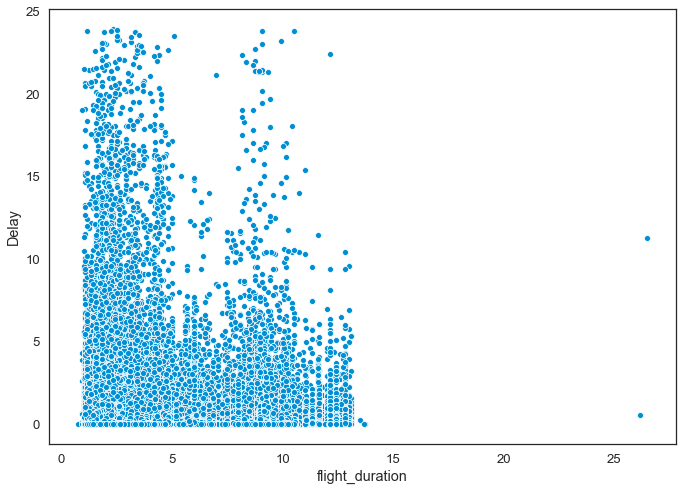

In [75]:
#sns.lineplot(data=df, x='flight_duration', y= 'Delay', palette="tab10", linewidth=2.5)
f, ax = plt.subplots(figsize=(10, 8))

ax = sns.scatterplot(data=df, x="flight_duration", y="Delay")


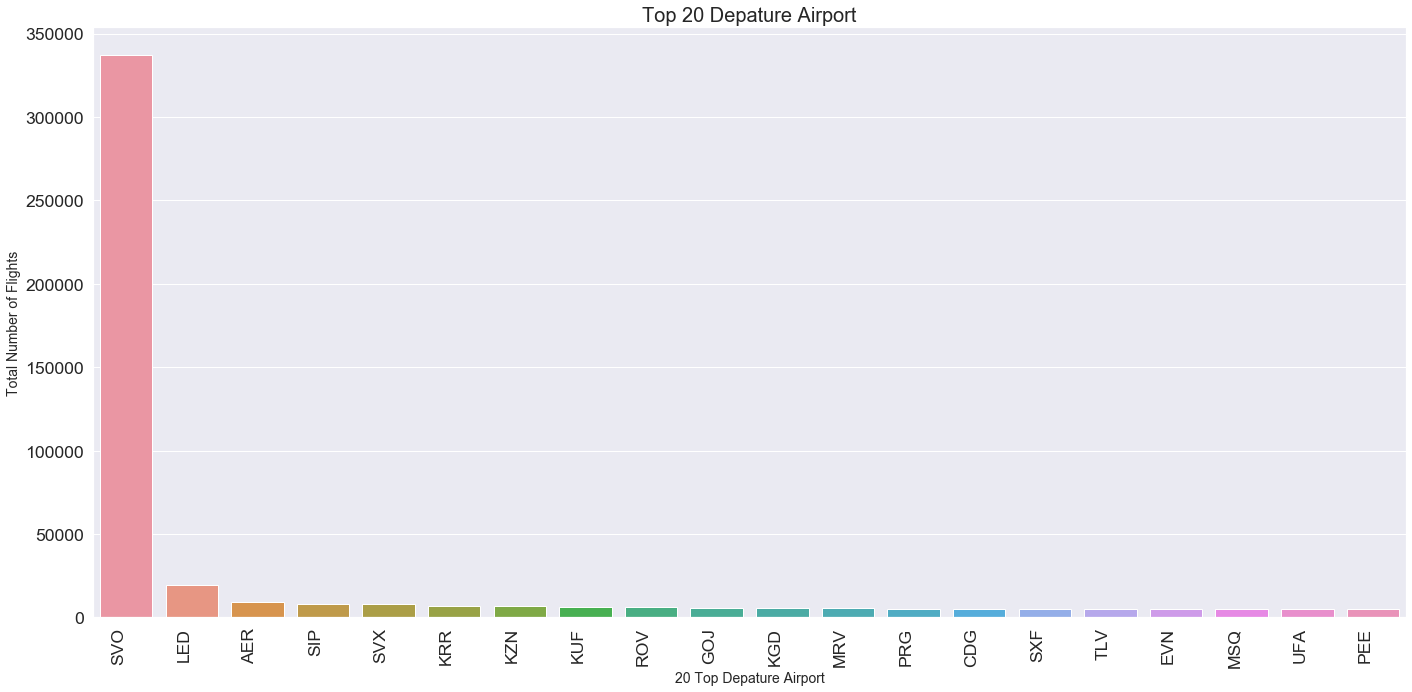

In [80]:

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['Depature Airport'], data=df, order=df['Depature Airport'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 20 Depature Airport', fontsize=20)
plt.xlabel('20 Top Depature Airport', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

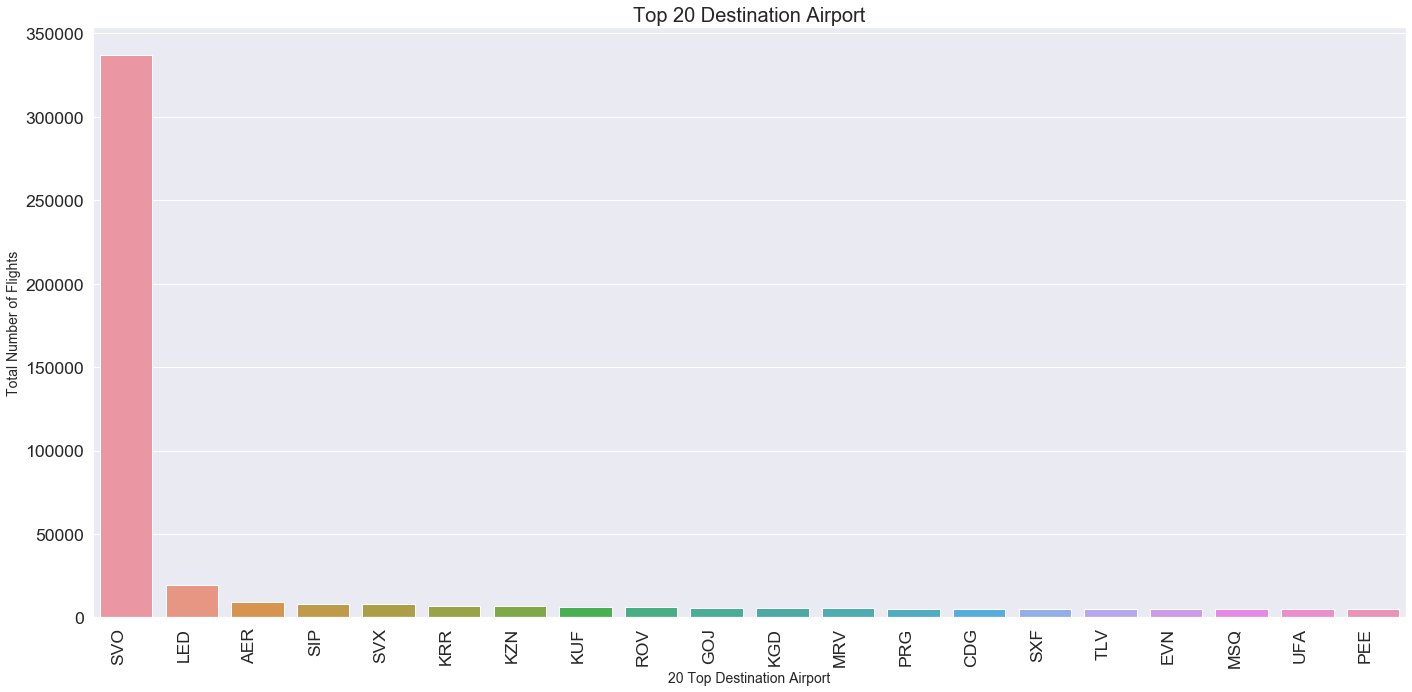

In [81]:

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['Destination Airport'], data=df, order=df['Destination Airport'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 20 Destination Airport', fontsize=20)
plt.xlabel('20 Top Destination Airport', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

In [82]:
# Convert categorical data into numerical values

# one-hot-encode categorical features
'''
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False)
cat_features = ['Depature Airport', 'Destination Airport']
encoder.fit(df[cat_features])
df = ohe_new_features(df, cat_features, encoder)
df.head()
'''
encoder = LabelEncoder()
df['Depature Airport'] = encoder.fit_transform(df['Depature Airport'])
df['Destination Airport'] = encoder.fit_transform(df['Destination Airport'])
df.head()

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,flight_duration
0,144,2015-10-27 07:40:00,56,2015-10-27 20:45:00,0.000000,13.083333
1,144,2015-10-27 09:50:00,68,2015-10-27 20:35:00,0.033333,10.750000
2,144,2015-10-27 10:45:00,94,2015-10-27 23:35:00,0.000000,12.833333
3,144,2015-10-27 12:30:00,82,2015-10-28 01:20:00,0.000000,12.833333
4,113,2015-10-27 14:15:00,144,2015-10-27 16:40:00,0.150000,2.416667


In [83]:
# Extracting new features from Scheduled depature time column
df['year_dep']=df['Scheduled depature time'].dt.year 
df['month_dep']=df['Scheduled depature time'].dt.month 
df['day_dep']=df['Scheduled depature time'].dt.day
df['dayofweek_dep']=df['Scheduled depature time'].dt.dayofweek  
df['hour_dep'] = df['Scheduled depature time'].dt.hour 
df['minute_dep'] = df['Scheduled depature time'].dt.minute

# Extracting new features from Scheduled arrival time column
df['year_arr']=df['Scheduled arrival time'].dt.year 
df['month_arr']=df['Scheduled arrival time'].dt.month 
df['day_arr']=df['Scheduled arrival time'].dt.day
df['dayofweek_arr']=df['Scheduled arrival time'].dt.dayofweek  
df['hour_arr'] = df['Scheduled arrival time'].dt.hour 
df['minute_arr'] = df['Scheduled arrival time'].dt.minute

df = df.drop(['Scheduled depature time', 'Scheduled arrival time'], axis=1)

df.head()

,Depature Airport,Destination Airport,Delay,flight_duration,year_dep,month_dep,day_dep,dayofweek_dep,hour_dep,minute_dep,year_arr,month_arr,day_arr,dayofweek_arr,hour_arr,minute_arr
0,144,56,0.000000,13.083333,2015,10,27,1,7,40,2015,10,27,1,20,45
1,144,68,0.033333,10.750000,2015,10,27,1,9,50,2015,10,27,1,20,35
2,144,94,0.000000,12.833333,2015,10,27,1,10,45,2015,10,27,1,23,35
3,144,82,0.000000,12.833333,2015,10,27,1,12,30,2015,10,28,2,1,20
4,113,144,0.150000,2.416667,2015,10,27,1,14,15,2015,10,27,1,16,40


### PCA

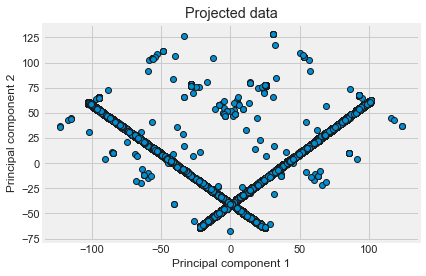

In [87]:

pca = PCA(n_components=2)
x_PCA = pca.fit_transform(df)

plt.title("Projected data")
plt.scatter(x_PCA[:, 0], x_PCA[:, 1], cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")

plt.show()

## Outlier Detection & Removal

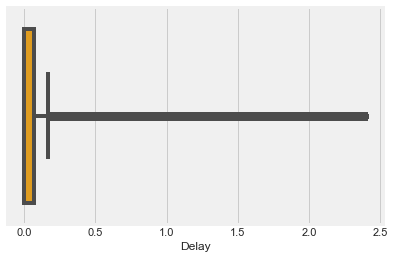

In [29]:
#sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df['Delay'], color='orange')


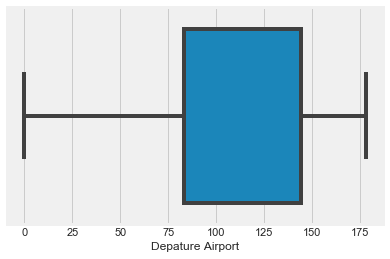

In [23]:
ax = sns.boxplot(x = df['Depature Airport'])


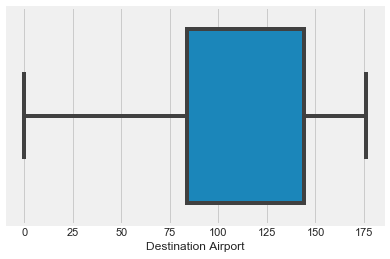

In [24]:
ax = sns.boxplot(x = df['Destination Airport'])


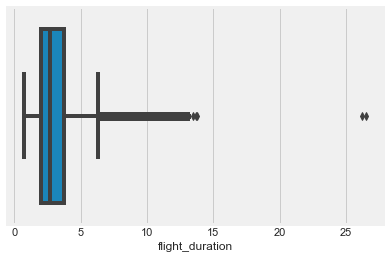

In [25]:
ax = sns.boxplot(x = df['flight_duration'])


**Observe** It is obvious that both Destination and Depature airports have no outliers, but cloumns such as flight duration and delay have outlier values. We should remove these outliers in following code.

In [14]:
# Removing outliers from Delay column
upper_dealy = df['Delay'].mean() + 3 * df['Delay'].std()
lower_dealy = df['Delay'].mean() - 3 * df['Delay'].std()
df          = df[(df['Delay'] < upper_dealy) & (df['Delay'] > lower_dealy)]

# Removing outliers from flight duration column
upper_dealy = df['flight_duration'].mean() + 3 * df['flight_duration'].std()
lower_dealy = df['flight_duration'].mean() - 3 * df['flight_duration'].std()
df          = df[(df['flight_duration'] < upper_dealy) & (df['flight_duration'] > lower_dealy)]

## Buliding Model

In [15]:
# Split train & test data depends on year's value
df_train = df[df['year_dep'] <= 2017]
df_test  = df[df['year_dep'] == 2018]
df_train.head()

,Depature Airport,Destination Airport,Delay,flight_duration,year_dep,month_dep,day_dep,dayofweek_dep,hour_dep,minute_dep,year_arr,month_arr,day_arr,dayofweek_arr,hour_arr,minute_arr
4,113,144,0.150000,2.416667,2015,10,27,1,14,15,2015,10,27,1,16,40
5,53,144,0.000000,2.750000,2015,10,27,1,14,30,2015,10,27,1,17,15
7,35,144,0.016667,5.666667,2015,10,27,1,15,40,2015,10,27,1,21,20
8,144,171,0.000000,8.416667,2015,10,27,1,16,10,2015,10,28,2,0,35
9,156,144,0.000000,4.166667,2015,10,27,1,16,45,2015,10,27,1,20,55


In [16]:
X_train    = df_train.drop('Delay', axis = 1)
X_train_fd = df_train['flight_duration']
y_train    = df_train['Delay']

X_test     = df_test.drop('Delay', axis = 1)
X_test_fd  = df_test['flight_duration']
y_test     = df_test['Delay']

# Reshape data because it contains a single sample
X_train_fd = X_train_fd.values.reshape(-1, 1)
X_test_fd  = X_test_fd.values.reshape(-1,1)

print(X_train.shape, y_train.shape)

(477762, 15) (477762,)


**Scale features**

In [17]:
# After trying other scalers, I found this one is the best

scaler = RobustScaler()
# scale x with one feature
scaler.fit(X_train_fd)
X_train_fd = scaler.transform(X_train_fd)
X_test_fd = scaler.transform(X_test_fd)
# scale x with one feature
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

**simple linear regression**

In [11]:

regressor = LinearRegression()
regressor.fit(X_train_fd, y_train)

print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(X_test_fd)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
eval_df.head()

Model intercept : 0.11143599380951827
Model coefficient : [0.02499832]


,Actual,Predicted
499059,0.000000,0.133934
499060,0.000000,0.125185
499061,0.000000,0.156433
499062,0.016667,0.133934
499063,0.000000,0.130185


In [12]:
# model perfomence metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13913077824858922
Mean Squared Error: 0.04947603399088326
Root Mean Squared Error: 0.22243208849193333


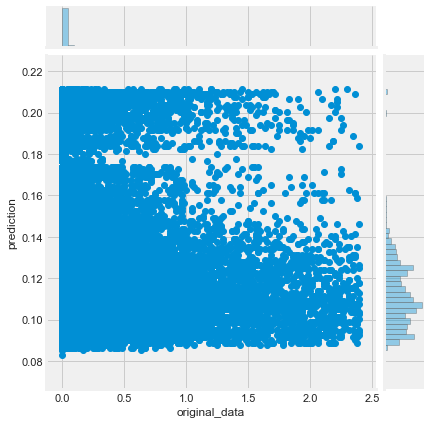

In [13]:
# In practice, this model tends to underestimate the large delays, which can be seen in the following figure:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in y_pred]) 
tips["original_data"] = pd.Series([float(s) for s in y_test]) 

sns.jointplot(data=tips, x="original_data", y="prediction", size = 6, ratio = 7)

**multiple linear regression**

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

y_pred = regressor.predict(X_test)

Model intercept : 0.11217053533791085
Model coefficients : [-5.62385829e-03  1.25818326e-02  2.73234609e-02  1.79384565e+00
  8.22678249e-01  7.75911704e-02 -6.29693881e-03  2.77674788e-02
  5.37436977e-03 -1.78279587e+00 -8.15836824e-01 -8.63622541e-02
  9.34972279e-03  6.52897528e-03  1.43653375e-03]


In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.15059552902779155
Mean Squared Error: 0.05162560383717391
Root Mean Squared Error: 0.22721268414675688


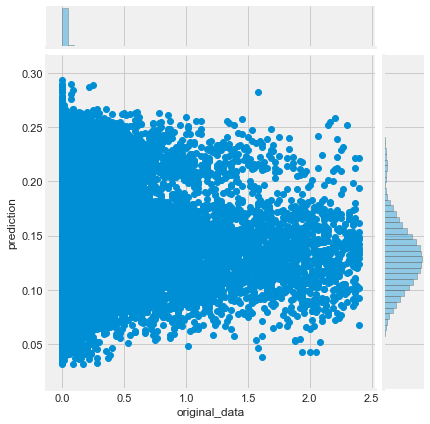

In [16]:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in y_pred]) 
tips["original_data"] = pd.Series([float(s) for s in y_test]) 

sns.jointplot(data=tips, x="original_data", y="prediction", size = 6, ratio = 7)

### Polynomial regression
Now I'll extend the previous fit by using a polynomial rather than a linear function:



**simple**

In [17]:
p = PolynomialFeatures(degree=3)
X_train_p = p.fit_transform(X_train_fd)
reg = LinearRegression()
y_train_ = reg.fit(X_train_p, y_train)

# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [ 0.          0.01876244 -0.00066319  0.00099433]
Intercept:  0.11126253585287699


In [18]:
X_test_p = p.fit_transform(X_test_fd)
prediction = reg.predict(X_test_p)

print('====== test ==========')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

====== test ==========
Mean Absolute Error: 0.13905280927409405
Mean Squared Error: 0.04942222784582674
Root Mean Squared Error: 0.2223111059884925


In [20]:
X_test_p = p.fit_transform(X_train_fd)
prediction = reg.predict(X_test_p)

print('====== train ==========')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, prediction)))

====== train ==========
Mean Absolute Error: 0.15353416734973246
Mean Squared Error: 0.07666716698172282
Root Mean Squared Error: 0.2768883655586179


**Multiple features**

In [21]:
# 
poly = PolynomialFeatures(degree=2)
X_train_p = poly.fit_transform(X_train)
X_train_p

array([[ 1.        , -0.50819672,  0.        , ...,  0.07438017,
         0.13636364,  0.25      ],
       [ 1.        , -1.49180328,  0.        , ...,  0.1322314 ,
        -0.12121212,  0.11111111],
       [ 1.        , -1.78688525,  0.        , ...,  0.52892562,
        -0.12121212,  0.02777778],
       ...,
       [ 1.        ,  0.        , -2.11666667, ...,  0.40495868,
        -0.21212121,  0.11111111],
       [ 1.        ,  0.        , -1.31666667, ...,  1.        ,
         0.66666667,  0.44444444],
       [ 1.        ,  0.        , -0.81666667, ...,  0.29752066,
        -0.18181818,  0.11111111]])

In [22]:
reg = LinearRegression()
y_train_ = reg.fit(X_train_p, y_train)

# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [ 7.25837975e+05 -5.85772399e-04  2.03870468e-02 -1.96201452e+08
 -3.74464124e+09  4.32287044e+10  2.72328891e+09 -3.41561933e+10
 -1.29492958e+09 -5.88604356e+07  3.74464124e+09 -4.32287044e+10
 -2.74005865e+09  3.42852989e+10  1.29492958e+09  5.88604357e+07
 -2.00653076e-03  2.28182077e-02 -1.87730789e-02 -1.91078186e-02
 -3.54909897e-02 -1.66893005e-03  6.94465637e-03  5.96714020e-03
  7.26127625e-03  1.11198425e-02  3.07254791e-02  1.28030777e-03
 -7.96508789e-03 -9.38022137e-03  7.10582733e-03  4.07791138e-03
  4.49228287e-03  2.29030991e+00  1.15120554e+00  9.43422318e-02
  5.62381744e-03  1.73610449e-03  2.19058990e-03 -2.29514503e+00
 -1.15178180e+00 -9.42773819e-02 -6.52408600e-03  5.42736053e-03
 -6.75201416e-04  5.24946518e+06  9.37221086e+08 -1.99353103e+09
 -3.86518279e+08  2.23717702e+09  6.92929403e+07  3.14967910e+06
 -9.37221086e+08  1.99353103e+09  3.76037192e+08 -2.15648600e+09
 -6.92929403e+07 -3.14967911e+06  2.28194862e+10 -2.53938810e+10
  2.414601

In [24]:
X_test_poly = poly.fit_transform(X_test)
y_test_pred = reg.predict(X_test_poly)
print('========== test =============')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

========== test =============
Mean Absolute Error: 0.09014749032988165
Mean Squared Error: 0.04528907888294522
Root Mean Squared Error: 0.21281230904941853


In [26]:
X_test_poly = poly.fit_transform(X_train)
y_test_pred = reg.predict(X_test_poly)
print('===== train =========')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_test_pred)))

===== train =========
Mean Absolute Error: 0.15034370645523784
Mean Squared Error: 0.0754479218274245
Root Mean Squared Error: 0.27467785099535147


### Lasso

0.04975233451310267
0.04975233451310267
0.04975233451310267
0.04975233451310267
0.04975233451310267
0.04975233451310267
0.04975233451310267
0.04975233451310267
0.04975233451310267


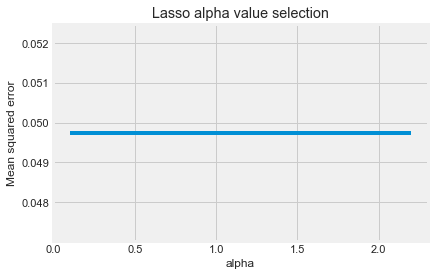

In [20]:
alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    print(mse)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()


In [23]:
best_alpha = alphas[np.argmin(losses)]
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Best value of alpha:", best_alpha)
print('========== test ===========')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Best value of alpha: 2.2
========== test ===========
Mean Absolute Error: 0.14059541288062818
Mean Squared Error: 0.04975233451310267
Root Mean Squared Error: 0.22305231340002432


In [24]:
y_pred = lasso.predict(X_train)
print('========== train ===========')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

========== train ===========
Mean Absolute Error: 0.15523564675279844
Mean Squared Error: 0.0772692434106419
Root Mean Squared Error: 0.27797345810462176
